# ЛР1
- Найдите временной ряд с ценами активов (цены акций, облигаций, нефти, криптовалюты и т.д.)
- Отобразите временной ряд на графике
- Оцените его
- Сделайте начальные выводы
- Постройте 4 скользящие средние с окнами (5, 10, 30, 50)
- Оцените график с скоьзящими среднмии
- Сделайте предыдыдущие 2 пункта с экспоненциальными скользящими средними
- Сделайте прогноз движения актива на основе экспоненциального скользящего среднего на 5 периодов вперед.

### Импорт библиотек

In [1]:
!pip install ta
import pandas as pd
import matplotlib.pyplot as plt
import ta

Defaulting to user installation because normal site-packages is not writeable


### Загрузка данных и отображение первых нескольких строк данных

In [2]:
data.set_index('datetime', inplace=True)

# Выбор последних 300 записей
data = data.tail(250)
print(data.head())

              open    high     low   close  volume
datetime                                          
2023-08-30  141.53  141.88  139.25  140.50    2050
2023-08-31  140.90  145.87  140.75  144.13    5624
2023-09-01  144.12  144.95  142.87  143.95    2094
2023-09-04  144.97  146.93  144.44  146.47    3102
2023-09-05  146.37  146.57  143.50  144.98    3353


### Отображение временного ряда на графике

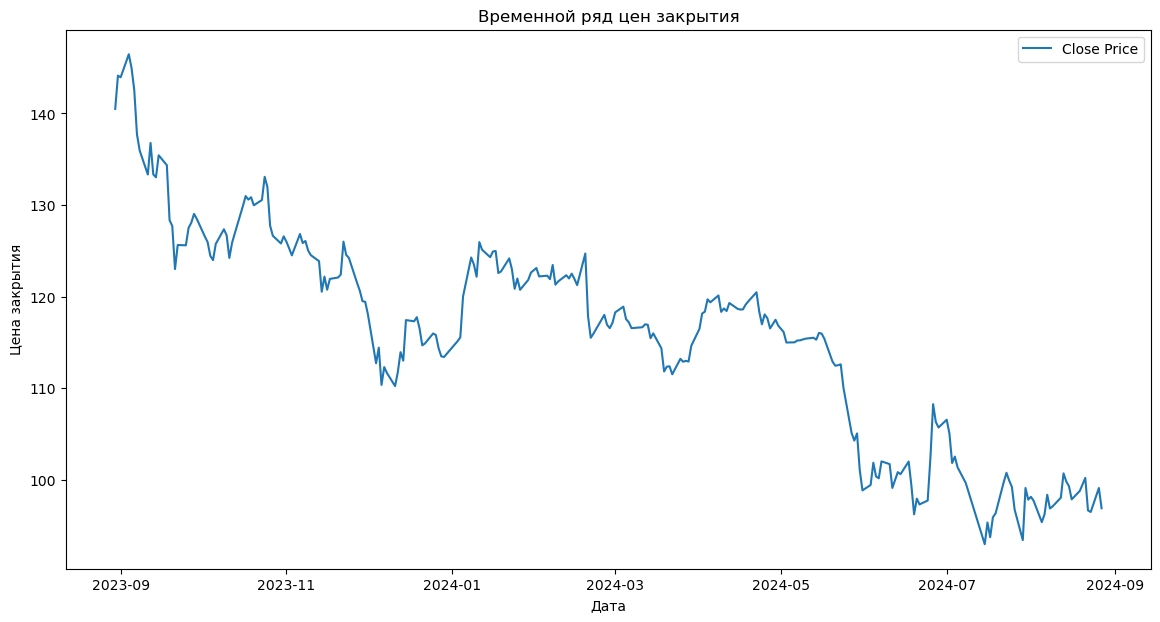

In [3]:
plt.figure(figsize=(14, 7))
plt.plot(data['close'], label='Close Price')
plt.title('Временной ряд цен закрытия')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия')
plt.legend()
plt.show()

### Cкользящие средние

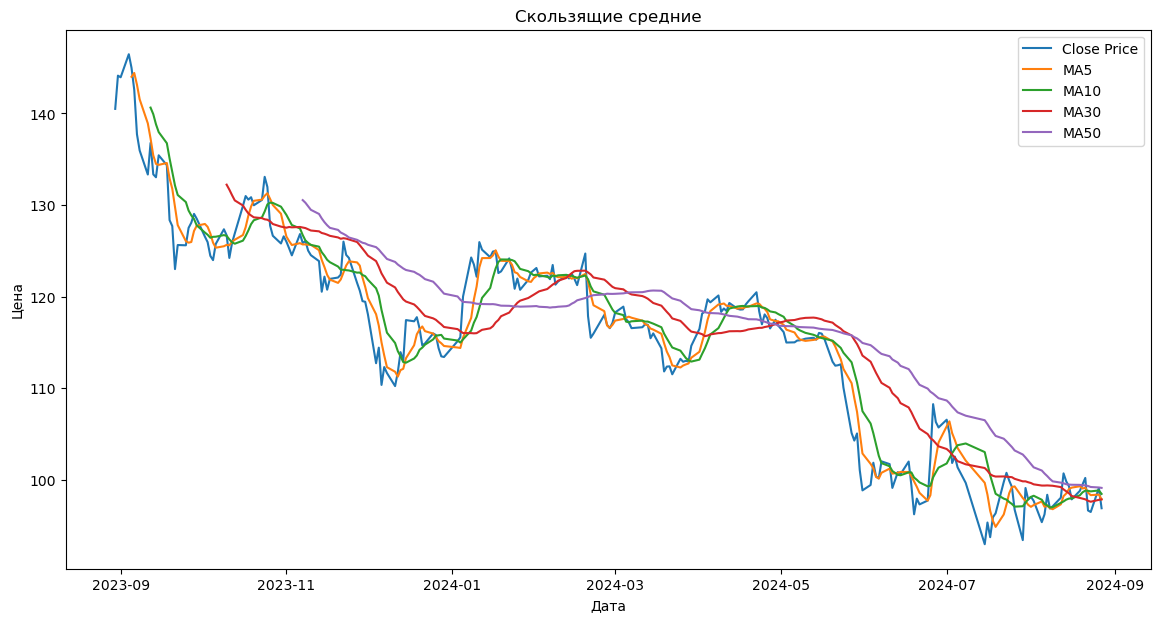

In [4]:
# Построение скользящих средних
data['MA5'] = data['close'].rolling(window=5).mean()
data['MA10'] = data['close'].rolling(window=10).mean()
data['MA30'] = data['close'].rolling(window=30).mean()
data['MA50'] = data['close'].rolling(window=50).mean()

# Отображение скользящих средних на графике
plt.figure(figsize=(14, 7))
plt.plot(data['close'], label='Close Price')
plt.plot(data['MA5'], label='MA5')
plt.plot(data['MA10'], label='MA10')
plt.plot(data['MA30'], label='MA30')
plt.plot(data['MA50'], label='MA50')
plt.title('Скользящие средние')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()

# Экспоненциальные скользящие средние

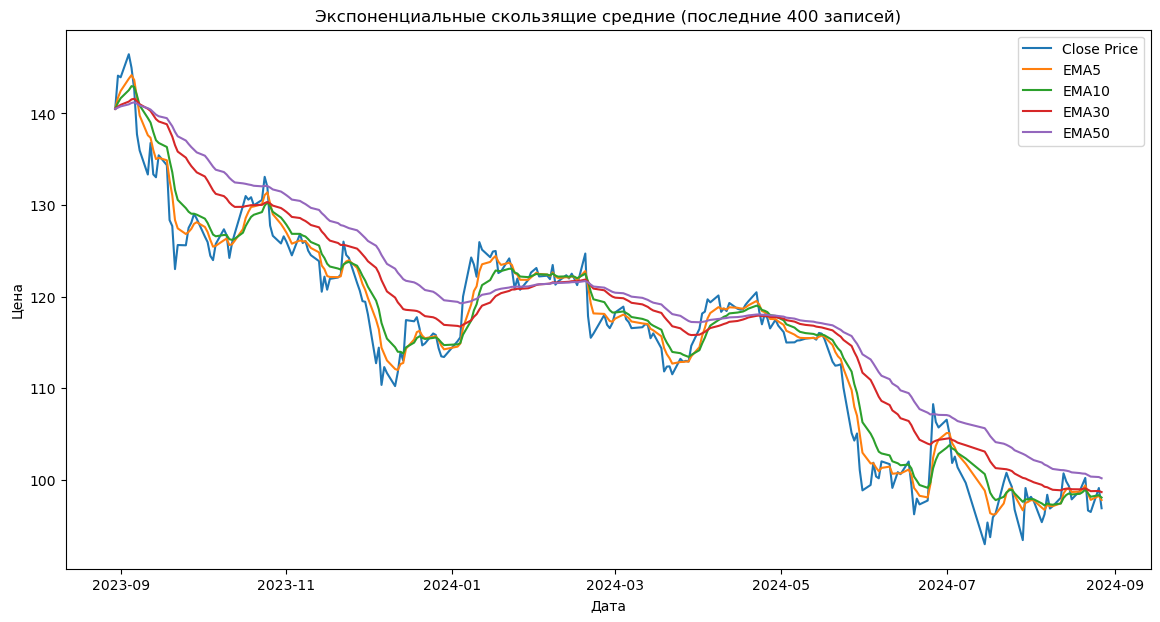

In [5]:
# Построение экспоненциальных скользящих средних
data['EMA5']  = data['close'].ewm(span=5, adjust=False).mean()
data['EMA10'] = data['close'].ewm(span=10, adjust=False).mean()
data['EMA30'] = data['close'].ewm(span=30, adjust=False).mean()
data['EMA50'] = data['close'].ewm(span=50, adjust=False).mean()

# Отображение графиков
plt.figure(figsize=(14, 7))
plt.plot(data['close'], label='Close Price')
plt.plot(data['EMA5'], label='EMA5')
plt.plot(data['EMA10'], label='EMA10')
plt.plot(data['EMA30'], label='EMA30')
plt.plot(data['EMA50'], label='EMA50')
plt.title('Экспоненциальные скользящие средние (последние 400 записей)')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()

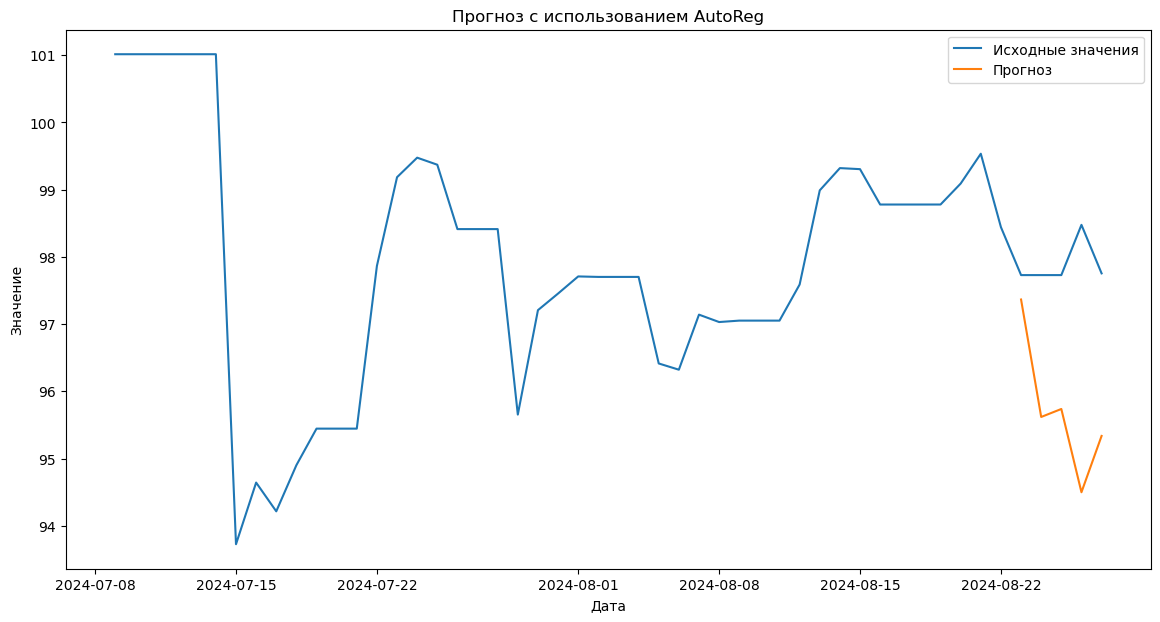

In [6]:
from statsmodels.tsa.ar_model import AutoReg

# Преобразование индекса в datetime
data.index = pd.to_datetime(data.index)
data = data.asfreq('D')

# Расчет EMA5
ema5 = data["close"].ewm(span=5).mean()

# Прогноз на 5 периодов вперед
forecast_len = 5
model = AutoReg(ema5[:-forecast_len], lags=129).fit()
forecast = model.forecast(steps=forecast_len)

# Отображение прогноза
plt.figure(figsize=(14, 7))
plt.plot(data.index[-forecast_len*10:], ema5[-forecast_len*10:], label="Исходные значения")
plt.plot(data.index[-forecast_len:], forecast, label="Прогноз")
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("Прогноз с использованием AutoReg")
plt.legend()
plt.show()